### Importing the Libraries and the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.gridspec as gs
import warnings
from IPython.display import Image
from matplotlib import colors as mcolors
warnings.simplefilter(action='ignore', category=FutureWarning)
pio.renderers.default = 'notebook_connected'

### Teams

> This portion of the dataset is utilized in the first visualization to count the number of teams per each category. It contains detailed information about each diffrent team


In [3]:
teams = pd.read_csv("archive (5)/teams.csv")
teams.head(2)

,code,current,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,True,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,True,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN


> There are no duplicates in this dataset; however, there is a significant amount of missing data, particularly in the coach-related columns. I will be address these issues during the preprocessing part

In [4]:
duplicates = teams[teams.duplicated()]
print("Number of duplicate rows:", len(duplicates))
missing_count = teams.isnull().sum()
print("Total missing values :\n", missing_count)

Number of duplicate rows: 0
Total missing values :
 code                   0
current                0
team                   0
team_gender            0
country_code           0
country                0
country_long           0
discipline             0
disciplines_code       0
events               321
athletes               3
coaches             1452
athletes_codes         3
num_athletes           3
coaches_codes       1452
num_coaches         1452
dtype: int64


### Athletes

> This section of the dataset is used in the 2nd and 3rd visualizations. It will  provides detailed information about each athlete who participated in the competitions

In [5]:
athletes = pd.read_csv('archive (5)/athletes.csv')
athletes.head(2)

,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN


> While there are no duplicates in this dataset, there is several columns have a significant number of missing value's that will need to be handled during the preprocessing parts

In [6]:
duplicates = athletes[athletes.duplicated()]
print("Number of duplicate rows:", len(duplicates))
missing_count = athletes.isnull().sum()
print("Total missing values :\n", missing_count)

Number of duplicate rows: 0
Total missing values :
 code                      0
current                   0
name                      0
name_short                3
name_tv                   3
gender                    0
function                  0
country_code              0
country                   0
country_long              0
nationality               3
nationality_long          3
nationality_code          3
height                    3
weight                    5
disciplines               0
events                    0
birth_date                0
birth_place            2386
birth_country          1638
residence_place        4309
residence_country      2825
nickname               8147
hobbies                6906
occupation             1529
education              5575
family                 5552
lang                    508
coach                  2891
reason                 5267
hero                   7798
influence              8958
philosophy             8330
sporting_relatives     8

###Medallists

> This section of the dataset is utilized in the remaining visualizations (5th to 8th) and contains all the information about the winning athletes across all competitions

In [7]:
medalists = pd.read_csv('archive (5)/medallists.csv')
medalists.head(2)

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True


> Similar to the previous datasets, there are no duplicates here. However, a significant number of missing values are present in some columns, which will be addressed during preprocessing

In [8]:
duplicates = medalists[medalists.duplicated()]
print("Number of duplicate rows:", len(duplicates))
missing_count = medalists.isnull().sum()
print("Total missing values :\n", missing_count)

Number of duplicate rows: 0
Total missing values :
 medal_date            0
medal_type            0
medal_code            1
name                  0
gender                0
country_code          0
country               0
country_long          0
nationality_code      1
nationality           1
nationality_long      1
team                760
team_gender         760
discipline            0
event                 0
event_type            0
url_event            21
birth_date            0
code_athlete          0
code_team           760
is_medallist          0
dtype: int64


# **Preprocessing**

> In this section, I will drop columns with a significant number of missing values from each dataset. For columns with fewer missing values, we will fill them with `unknown` and ignore columns with only 1 to 3 missing values

In [9]:
teams = teams.drop(['coaches', 'coaches_codes', 'num_coaches'], axis=1)
athletes = athletes.drop(['birth_place', 'birth_country', 'residence_place','birth_place', 'residence_country',
                          'nickname','hobbies', 'occupation', 'education','family', 'lang', 'coach',
                          'reason','hero', 'influence', 'philosophy','sporting_relatives', 'ritual', 'other_sports',], axis=1)
medalists = medalists.drop(['team', 'team_gender', 'code_team'], axis=1)
teams['events'].fillna('unknown', inplace=True)
medalists['url_event'].fillna('unknown', inplace=True)
missing_count0 = teams.isnull().sum()
missing_count1 = athletes.isnull().sum()
missing_count2 = medalists.isnull().sum()
print("Total missing values :\n", missing_count0)
print("Total missing values :\n", missing_count1)
print("Total missing values :\n", missing_count2)

Total missing values :
 code                0
current             0
team                0
team_gender         0
country_code        0
country             0
country_long        0
discipline          0
disciplines_code    0
events              0
athletes            3
athletes_codes      3
num_athletes        3
dtype: int64
Total missing values :
 code                0
current             0
name                0
name_short          3
name_tv             3
gender              0
function            0
country_code        0
country             0
country_long        0
nationality         3
nationality_long    3
nationality_code    3
height              3
weight              5
disciplines         0
events              0
birth_date          0
dtype: int64
Total missing values :
 medal_date          0
medal_type          0
medal_code          1
name                0
gender              0
country_code        0
country             0
country_long        0
nationality_code    1
nationality         1


In [10]:
country_mapping = medalists[['country_code', 'country']].drop_duplicates().set_index('country_code')
speed_sports_disciplines = ["Athletics", "Swimming", "3x3 Basketball", "Basketball", "Handball", "Hockey", "Football", "Rugby Sevens"]

# **Data Visualization**

##**Visualization 1: Number of Medals by Discipline and Gender**


The distributions depicted in the visualisations include medals won with respect to sports and the gender, and in total, for the top 20 disciplines. This breakdown gives understanding on the specifics of gender participation in sports to further push for gender mainstreaming. In the case of Olympics, having knowledge of which countries win medals in which discipline, we can observe which sports both male and female equally.

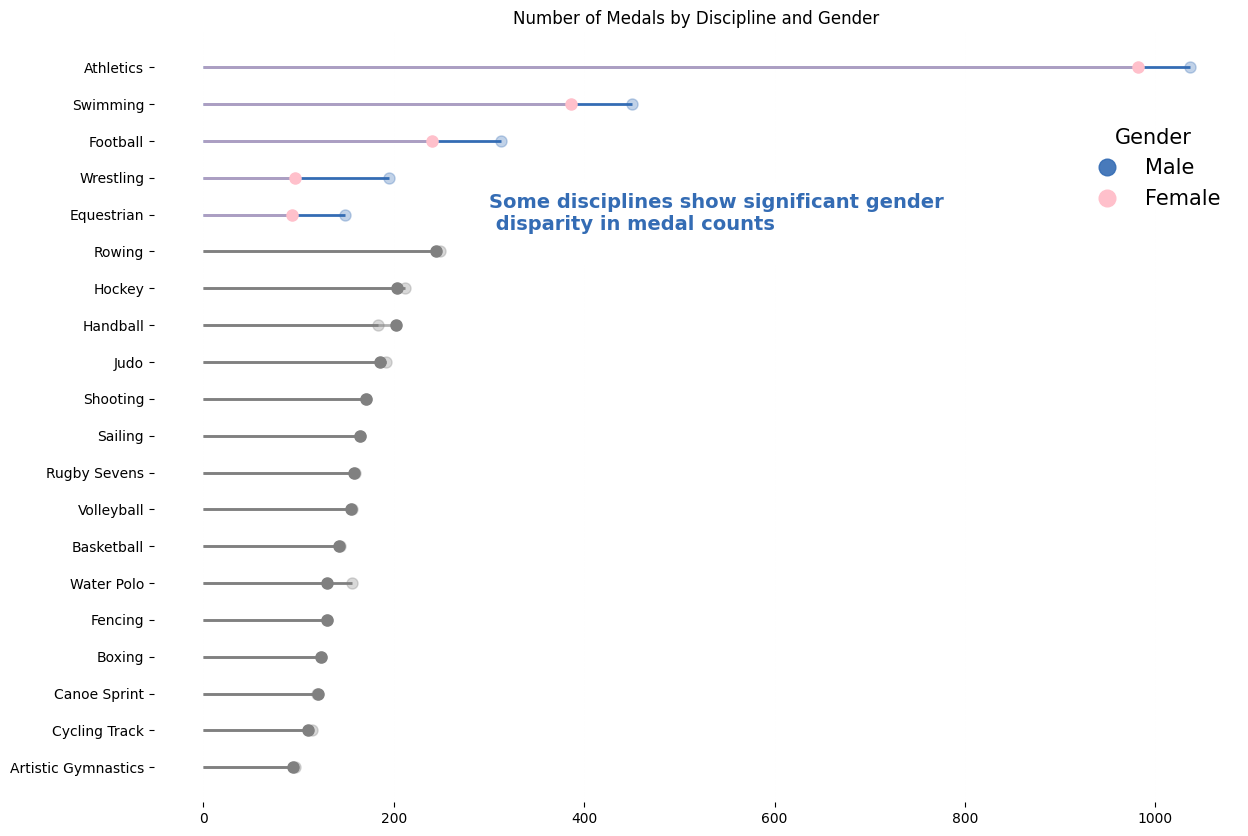

In [18]:
def clean_index(value):
    return value.strip("[]'").title()


def normalize_name(name):
    return name.strip().lower()
medal_count_by_discipline_gender = athletes.groupby(['disciplines', 'gender']).size().unstack()
total_medals = medal_count_by_discipline_gender.sum(axis=1)
top_20_disciplines = total_medals.nlargest(20).index
filtered_medal_count_by_discipline_gender = medal_count_by_discipline_gender.loc[top_20_disciplines]

filtered_medal_count_by_discipline_gender.index = [clean_index(discipline) for discipline in filtered_medal_count_by_discipline_gender.index]
highlight_disciplines = ['Athletics', 'Swimming', 'Football', 'Wrestling', 'Equestrian']
highlight_disciplines_normalized = [normalize_name(discipline) for discipline in highlight_disciplines]


normalized_index = [normalize_name(discipline) for discipline in filtered_medal_count_by_discipline_gender.index]
ordered_disciplines = highlight_disciplines_normalized + [d for d in normalized_index if d not in highlight_disciplines_normalized]
index_map = {normalize_name(clean_index(d)): clean_index(d) for d in filtered_medal_count_by_discipline_gender.index}
ordered_disciplines_cleaned = [index_map[d] for d in ordered_disciplines]


filtered_medal_count_by_discipline_gender = filtered_medal_count_by_discipline_gender.loc[ordered_disciplines_cleaned]
plt.figure(figsize=(14, 10))

for discipline in filtered_medal_count_by_discipline_gender.index:
    is_highlighted = normalize_name(discipline) in highlight_disciplines_normalized
    color_male = '#346cb4' if is_highlighted else 'gray'
    plt.hlines(y=discipline, xmin=0, xmax=filtered_medal_count_by_discipline_gender.loc[discipline, 'Male'], color=color_male, alpha=1, linewidth=2)
    plt.plot(filtered_medal_count_by_discipline_gender.loc[discipline, 'Male'], discipline, "o", color=color_male, alpha=0.3, markersize=8)

    color_female = 'pink' if is_highlighted else 'gray'
    plt.hlines(y=discipline, xmin=0, xmax=filtered_medal_count_by_discipline_gender.loc[discipline, 'Female'], color=color_female, alpha=0.6, linewidth=2)
    plt.plot(filtered_medal_count_by_discipline_gender.loc[discipline, 'Female'], discipline, "o", color=color_female, markersize=8)

plt.title('Number of Medals by Discipline and Gender')
plt.plot([], [], 'o', color='#346cb4', alpha=0.9, markersize=8, label='Male')
plt.plot([], [], 'o', color='pink', markersize=8, label='Female')
plt.legend(title='Gender', frameon=False, bbox_to_anchor=(1, 0.9), fontsize=15, title_fontsize='15', markerscale=1.5)

plt.grid(axis='x', linestyle='--', alpha=0.01)
plt.gca().yaxis.grid(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().invert_yaxis()

text_x=300
text_y=5
plt.text(text_x, text_y, 'Some disciplines show significant gender\n disparity in medal counts\n', fontsize=14, weight='bold', ha='left', color='#346cb4',
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
plt.show()

**Explanation**
Creates and aggregates data into medal groups by discipline and gender.
Cleans and filters data for the top 20 disciplines.
Organizes disciplines into normal form and sorts them and specific disciplines are marked.
Called a horizontal bar plot and colored according to gender.
Plots a legend, text for gender differences and adjusts graphical properties.
Shakes it to show the plot with the specified styling.

**Data Insight**
The visualization also shows that male athletes have equivalent or slightly higher medal tallies than female athletes in most other top twenty sports; specifically, male athletes dominate in Athletics, Swimming, Football, Wrestling, and Equestrian games. This reveals a skewed basic gender distribution in some fields, which suggest possible marketing and sponsorship strategies.

##**Visualization 2:Which Countries Lead in Gender Balance for Medals?**

### Insight Explanation

> The horizontal bar chart shows how medals are divided between men and women in the 20 top countries with the most total medals won. It gives a picture of the gender breakdown among medal winners, in each country and how success is split between male, female athletes. This visualization Highlight this:







- This data is useful for comparing countries in terms of gender equality and highlighting both leaders in promoting gender balence and areas that require improvement

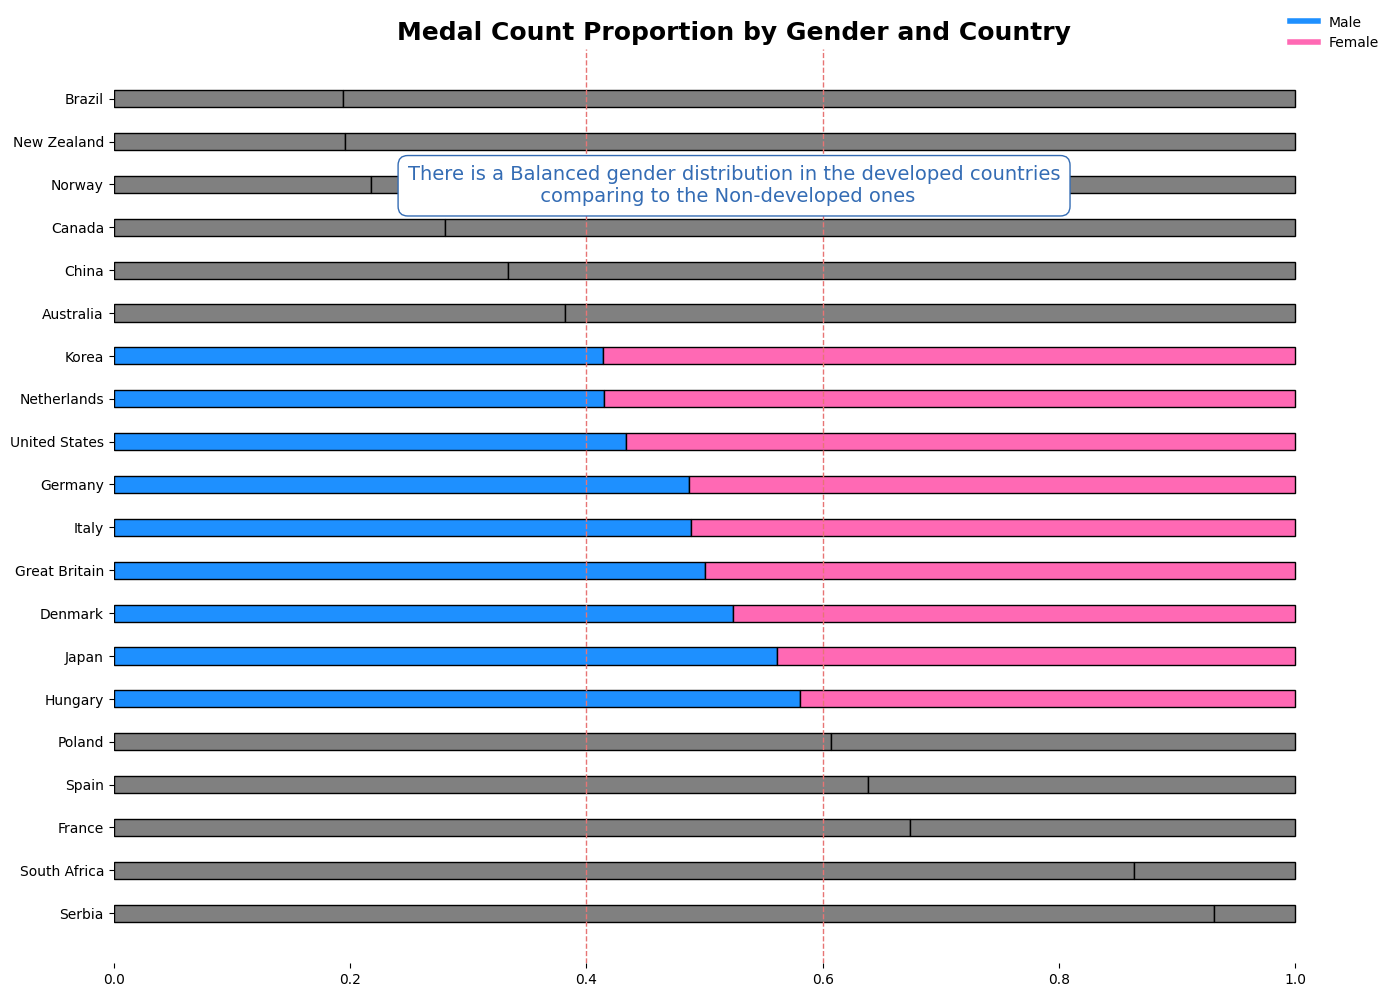

In [16]:
gender_medal_count = medalists.groupby(['country', 'gender'])['medal_type'].count().unstack().fillna(0)
gender_medal_count['total'] = gender_medal_count.sum(axis=1)
gender_medal_count['Male'] = gender_medal_count['Male'] / gender_medal_count['total']
gender_medal_count['Female'] = gender_medal_count['Female'] / gender_medal_count['total']
top_20_gender_balance = gender_medal_count.sort_values(by='total', ascending=False).head(20)
top_20_gender_balance = top_20_gender_balance.sort_values(by='Male', ascending=False)
highlight_countries = ['Netherlands', 'United States', 'Germany', 'Italy', 'Great Britain', 'Denmark', 'Japan', 'Korea', 'Hungary']
colors = []
for country in top_20_gender_balance.index:
    if country in highlight_countries:
        colors.append(('dodgerblue', 'hotpink'))
    else:
        colors.append(('gray', 'gray'))
plt.figure(figsize=(14, 10))
for i, country in enumerate(top_20_gender_balance.index):
    plt.barh(country, top_20_gender_balance['Male'][country], color=colors[i][0], edgecolor='black', height=0.4)
    plt.barh(country, top_20_gender_balance['Female'][country], left=top_20_gender_balance['Male'][country], color=colors[i][1], edgecolor='black', height=0.4)
plt.axvline(x=0.4, color='#e77474', linestyle='--', linewidth=1)
plt.axvline(x=0.6, color='#e77474', linestyle='--', linewidth=1)
handles = [
    plt.Line2D([0], [0], color='dodgerblue', lw=4, label='Male'),
    plt.Line2D([0], [0], color='hotpink', lw=4, label='Female')]
plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.03, 1.05), frameon=False)
plt.title('Medal Count Proportion by Gender and Country', fontsize=18, weight='bold')
plt.annotate(
    'There is a Balanced gender distribution in the developed countries\n comparing to the Non-developed ones   ',
    xy=(0.5, 0.85),xycoords='axes fraction',ha='center',va='center',fontsize=14,color='#346cb4',
    bbox=dict(facecolor='white', edgecolor='#346cb4', boxstyle='round,pad=0.5'))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.grid(False)
plt.tight_layout()
plt.show()

### Explanation

Join medalists with countries, gender, counts medals, then turn the table
Determining the total number of medal by country
Determining proportion of medal’s won by male, female in countries
– arranging three lists by total medal counts as well as comparing and selecting the top twenty
A listing of 20 top universal areas according to the percentage of medals acquired by males
Graphing the proportion of the medal’s awarded to males and females, in horizontal bars
Using dodgerblue for male , hotpink for female bars, adding that the male bars stacked to the left of the female bars
Writing axis labels and title and font sizes
Putting legend to differentiate the proportion between male and female
Adding to this, is the Text annotation that explain the balenced gender
Removing top and right spines, yet we need to adjust the tickness positions
– Turning some of the grid lines off to make it look better and Show the final bar plot

### Expanding on the data finding
For instance the Netherlands and some other countries such as USA Germany Italy and the UK show equal distribution of athletes of both genders with nearly equal distribution of medals as well, It appears that some countries are able to encourage gender balance while others have challenges in trying to achieve equal distribution of medals between male and female athletes

##**Visualization 3:what is the peak performance age for an athlete?**

<Figure size 1400x1000 with 0 Axes>

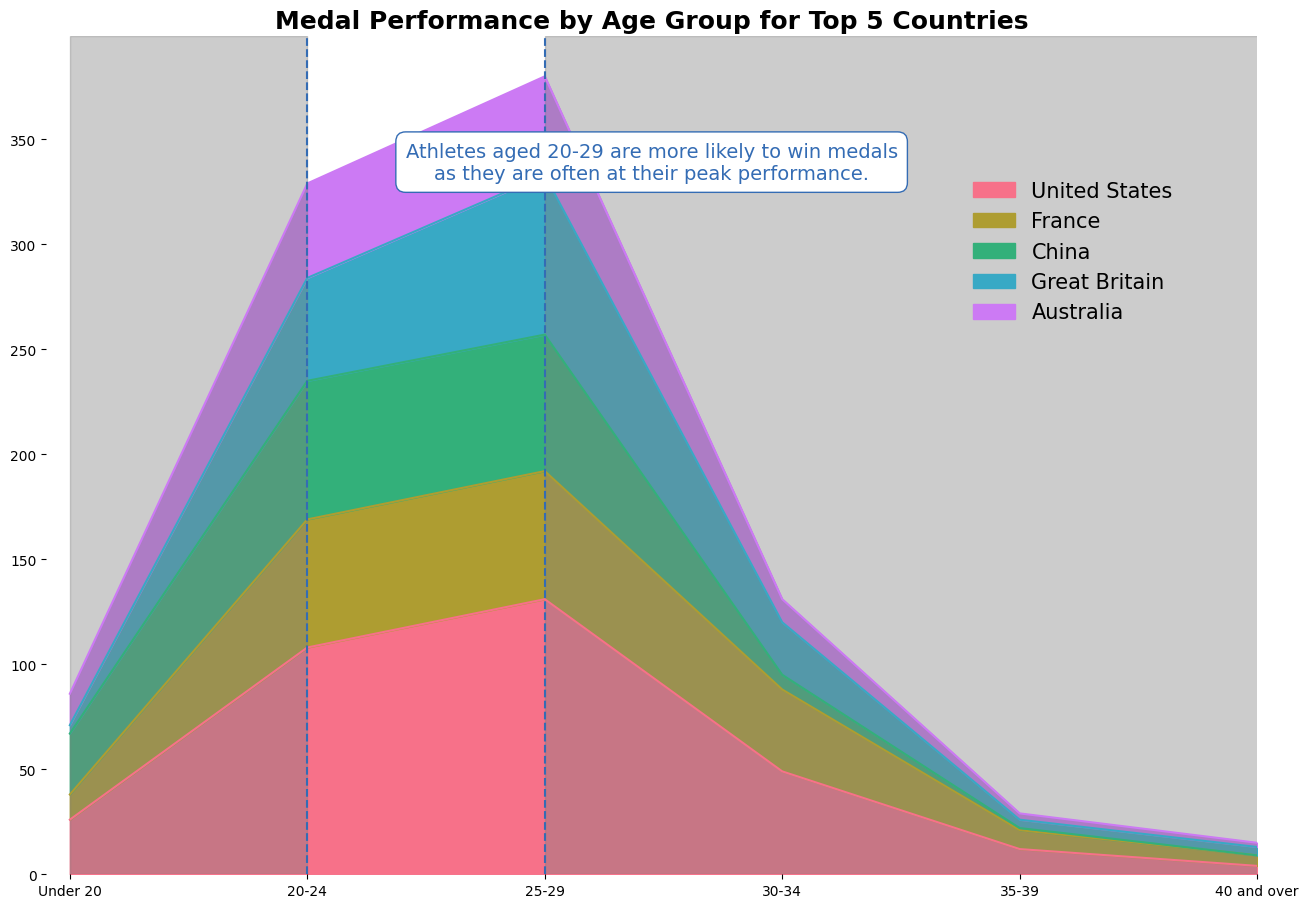

In [17]:
medalists['age'] = pd.to_datetime(medalists['medal_date']).dt.year - pd.to_datetime(medalists['birth_date']).dt.year
bins = [0, 20, 25, 30, 35, 40, 100]
labels = ['Under 20', '20-24', '25-29', '30-34', '35-39', '40 and over']
medalists['age_group'] = pd.cut(medalists['age'], bins=bins, labels=labels)


age_group_medal_count = medalists.groupby(['country', 'age_group'])['medal_type'].count().unstack().fillna(0)
top_10_countries_age = age_group_medal_count.sum(axis=1).sort_values(ascending=False).head(5)
age_group_medal_count = age_group_medal_count.loc[top_10_countries_age.index]

palette = sns.color_palette("husl", len(top_10_countries_age))
plt.figure(figsize=(14, 10))
ax = age_group_medal_count.T.plot(kind='area', stacked=True, figsize=(14, 10), color=palette)


plt.title('Medal Performance by Age Group for Top 5 Countries', fontsize=18, weight='bold')
x_labels = age_group_medal_count.columns
x_positions = range(len(x_labels))
x_20_24 = x_labels.get_loc('20-24')
x_25_29 = x_labels.get_loc('25-29')

plt.axvline(x=x_20_24, color='#346cb4', linestyle='--', linewidth=1.5)
plt.axvline(x=x_25_29, color='#346cb4', linestyle='--', linewidth=1.5)
ax.axvspan(0, x_20_24, color='gray', alpha=0.4)
ax.axvspan(x_25_29, len(x_labels), color='gray', alpha=0.4)

plt.annotate(
    'Athletes aged 20-29 are more likely to win medals\nas they are often at their peak performance.',
    xy=(0.5, 0.85),xycoords='axes fraction',ha='center',va='center',fontsize=14,color='#346cb4',
    bbox=dict(facecolor='white', edgecolor='#346cb4', boxstyle='round,pad=0.5'))



ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=0)
plt.xlabel('')
plt.legend(bbox_to_anchor=(0.75, 0.85), loc='upper left', frameon=False, fontsize=15, title_fontsize='15', markerscale=1.5)



ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlim(-0.1, len(x_labels) - 1)

plt.tight_layout(pad=4.0)
plt.show()

**Explanation**

It is an aggregation of message that calculates citizen’s age by comparing the medal_date and birth_date.
Categorizes ages into groups.
Calculates medals by country and fighter age.
Filters that sorts the countries by the total medals won by the top five countries.
Produces a stacked area chart of medal performance with regards to age for these countries.
Prime age information is thus marked with vertical lines, shading and annotations up to the appropriate age limits.
Enhances the color theme and its legend, and other additional features accompanied by amendments regarding its appearance.

**Data Insight**
Self-generated from the chart: The chart also surfaces the fact that maximum number of athletes are getting medals at the age of 25-29, which indicates that athletes peak performance is in this age group for the top 5 countries. Young men and women 20-24 years have also produced outstanding results as they move into the elite competitive age brackets. This trend indicates that the athletes’ potential profiles are most probably observe their best competency between the ages of 25 and 29 years and diminished competency before and after this sweet age span.



























